# Preparation

In [1]:
# !pip install pandas
# !pip install matplotlib

# Import libraries
import pandas as pd

from Utils import *

### Global Parameters

In [2]:
# Specify the data path
datafile = '../data/static-multimap-data.csv'

output_keys = ['Benchmark', 'Label', 'Distribution', 'MatchingRate', 'NumReps', 'NumInputs', \
               'Occupancy', 'GPU Time (sec)', 'Elem/s (elem/sec)', 'Bandwidth (GB/s)']

### Import Data

In [3]:
# Read csv file
rawdf = pd.read_csv(datafile)

# Filter out skipped tests
perfdf = rawdf[rawdf["Key"] == rawdf["Value"]].reset_index(drop=True)


# Add labels
perfdf['Label'] = perfdf["Key"]
perfdf.loc[perfdf['Distribution'].notnull(), 'Label'] += "_" + perfdf['Distribution']

perfdf["Bandwidth (GB/s)"] = perfdf["GlobalMem BW (bytes/sec)"] / (1000 * 1000 * 1000)

# Trim data frame for visualization
perfdf = perfdf[output_keys]

# Visualization

### Visualization Parameters

In [4]:
# Get benchmark list
unique_bms = perfdf["Benchmark"].unique()
for it in unique_bms:
    print(it)

nvbench_static_multimap_insert
nvbench_static_multimap_count
nvbench_static_multimap_find_all
nvbench_static_multimap_retrieve
count_varying_matching_rate
count_varying_num_reps


### insert 

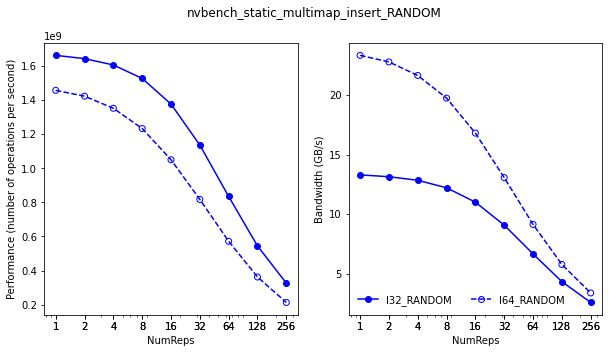

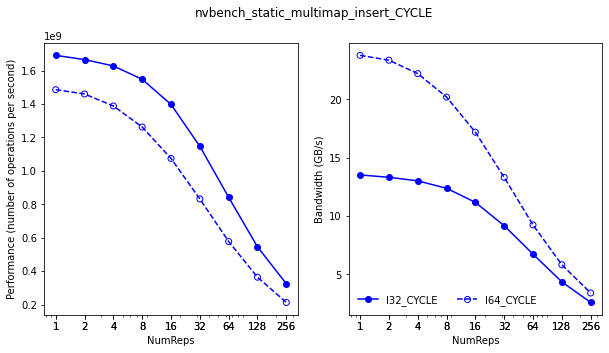

In [5]:
for bm in unique_bms:
    flag = "nvbench_static_multimap_insert" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        randomdf = tmpdf[tmpdf["Distribution"] == "RANDOM"].reset_index(drop=True)
        unique_labels = randomdf["Label"].unique()
        plot_perf(bm + "_RANDOM", randomdf, "NumReps", unique_labels, flag)
        
        cycledf = tmpdf[tmpdf["Distribution"] == "CYCLE"].reset_index(drop=True)
        unique_labels = cycledf["Label"].unique()
        plot_perf(bm + "_CYCLE", cycledf, "NumReps", unique_labels, flag)

### count

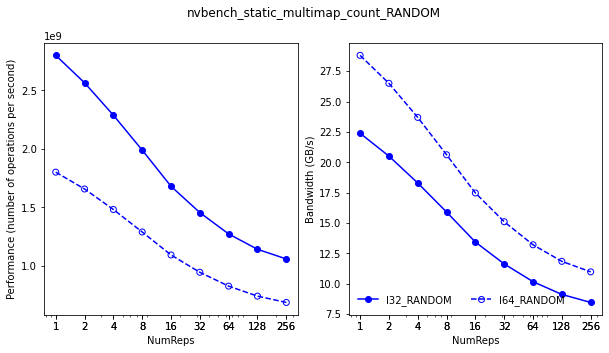

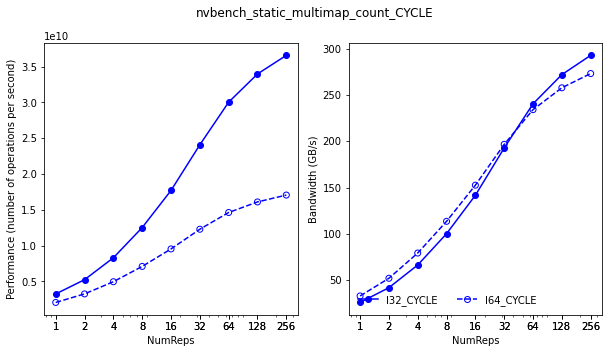

In [6]:
for bm in unique_bms:
    flag = "nvbench_static_multimap_count" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        randomdf = tmpdf[tmpdf["Distribution"] == "RANDOM"].reset_index(drop=True)
        unique_labels = randomdf["Label"].unique()
        plot_perf(bm + "_RANDOM", randomdf, "NumReps", unique_labels, flag)
        
        cycledf = tmpdf[tmpdf["Distribution"] == "CYCLE"].reset_index(drop=True)
        unique_labels = cycledf["Label"].unique()
        plot_perf(bm + "_CYCLE", cycledf, "NumReps", unique_labels, flag)

### find_all

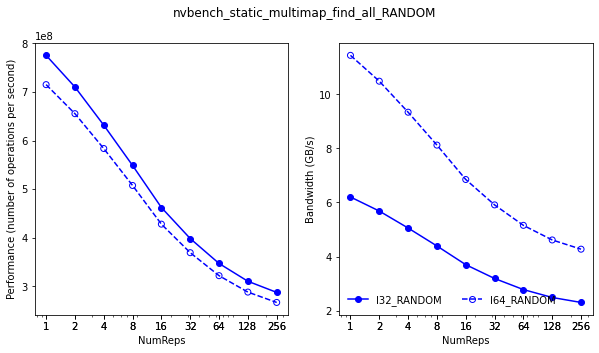

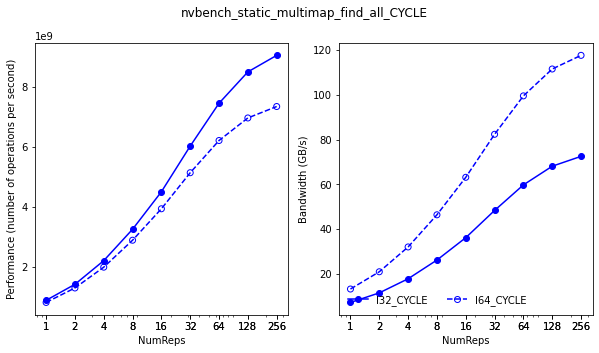

In [7]:
for bm in unique_bms:
    flag = "nvbench_static_multimap_find_all" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        randomdf = tmpdf[tmpdf["Distribution"] == "RANDOM"].reset_index(drop=True)
        unique_labels = randomdf["Label"].unique()
        plot_perf(bm + "_RANDOM", randomdf, "NumReps", unique_labels, flag)
        
        cycledf = tmpdf[tmpdf["Distribution"] == "CYCLE"].reset_index(drop=True)
        unique_labels = cycledf["Label"].unique()
        plot_perf(bm + "_CYCLE", cycledf, "NumReps", unique_labels, flag)

### retrieve

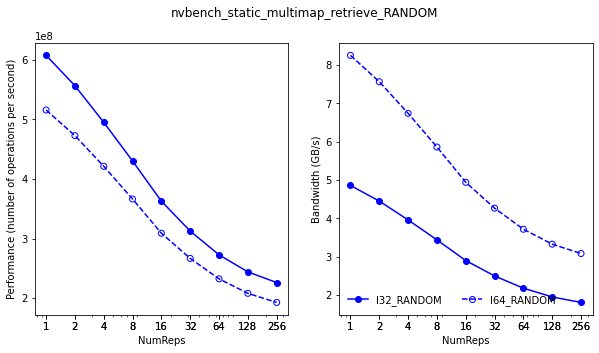

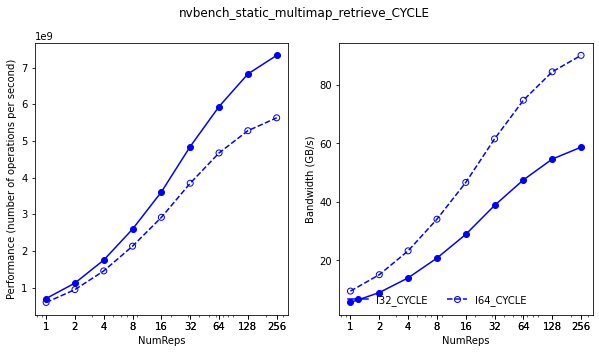

In [8]:
for bm in unique_bms:
    flag = "retrieve" in bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        randomdf = tmpdf[tmpdf["Distribution"] == "RANDOM"].reset_index(drop=True)
        unique_labels = randomdf["Label"].unique()
        plot_perf(bm + "_RANDOM", randomdf, "NumReps", unique_labels, flag)
        
        cycledf = tmpdf[tmpdf["Distribution"] == "CYCLE"].reset_index(drop=True)
        unique_labels = cycledf["Label"].unique()
        plot_perf(bm + "_CYCLE", cycledf, "NumReps", unique_labels, flag)

### count by varying matching rate
<ul>
<li>Fixed num_reps: 8</li>
<li>Random non-unique input keys</li>
</ul>

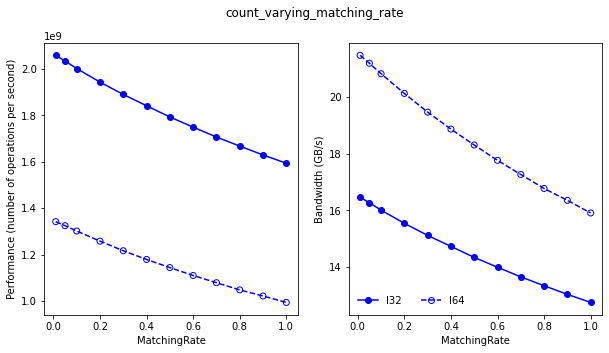

In [9]:
for bm in unique_bms:
    flag = "count_varying_matching_rate" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        unique_labels = tmpdf["Label"].unique()
        plot_perf(bm, tmpdf, "MatchingRate", unique_labels, flag)

### count by varying num_reps
<ul>
<li>Fixed matching rate: 0.5</li>
<li>Random non-unique input keys</li>
</ul>

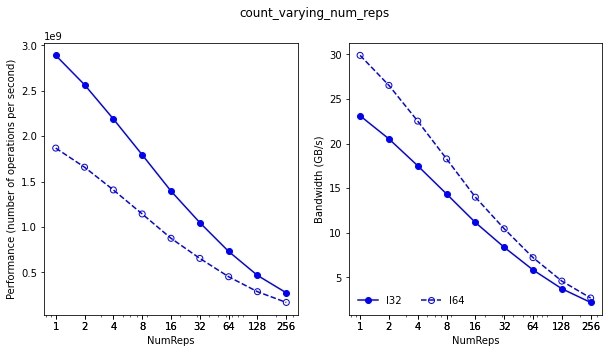

In [10]:
for bm in unique_bms:
    flag = "count_varying_num_reps" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        unique_labels = tmpdf["Label"].unique()
        plot_perf(bm, tmpdf, "NumReps", unique_labels, flag)